# Snake

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from environments_fully_observable import OriginalSnakeEnvironment
import numpy as np
from  tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from agents import BaselineAgent, RandomAgent, DQNAgent
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)

## Environment definition

In [3]:
def plot_board(boards, how_many=5):
    num_boards = min(len(boards), how_many)
    
    # If only one board is passed, axs should not be an array
    if num_boards == 1:
        fig, ax = plt.subplots(1, 1, figsize=(10, 3))
        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.imshow(boards[0], origin="lower")
    else:
        fig, axs = plt.subplots(1, num_boards, figsize=(10, 3))
        for ax, board in zip(axs, boards[:num_boards]):
            ax.get_yaxis().set_visible(False)
            ax.get_xaxis().set_visible(False)
            ax.imshow(board, origin="lower")

    plt.show()


## Baseline vs Random

In [4]:
MOVES_PER_GAME = 1000 
NUM_BOARDS = 10 # Change to 1000
BOARD_SIZE = 7
ITERS = 100

In [14]:
rnd_avg_rewards = []
baseline_avg_rewards = []

for iter in trange(ITERS):
    rnd_env = OriginalSnakeEnvironment(NUM_BOARDS, BOARD_SIZE)
    base_env = OriginalSnakeEnvironment(NUM_BOARDS, BOARD_SIZE)
    rnd_agent = RandomAgent(rnd_env.boards) # Random agent does not need the board
    baseline_agent = BaselineAgent(base_env.boards) 

    rnd_rewards = []
    baseline_rewards = []
    
    for _ in range(MOVES_PER_GAME):
        # Get actions from the agents
        rnd_actions = rnd_agent.get_actions()
        base_actions = baseline_agent.get_actions()
        
        # Perform the actions and get the rewards from the environment
        rnd_reward = rnd_env.move(rnd_actions)
        baseline_reward = base_env.move(base_actions)
        
        # Store the rewards for each move
        rnd_rewards.append(rnd_reward)
        baseline_rewards.append(baseline_reward)
    
    # Compute the average reward for this iteration
    rnd_avg_rewards.append(np.mean(rnd_rewards))
    baseline_avg_rewards.append(np.mean(baseline_rewards))

# After the training loop, you can plot or analyze the average rewards
print(f"Random Agent Average Rewards over {ITERS} iterations: {np.mean(rnd_avg_rewards)}")
print(f"Baseline Agent Average Rewards over {ITERS} iterations: {np.mean(baseline_avg_rewards)}")

100%|██████████| 100/100 [04:24<00:00,  2.64s/it]

Random Agent Average Rewards over 100 iterations: -0.014418398961424828
Baseline Agent Average Rewards over 100 iterations: 0.04303150251507759


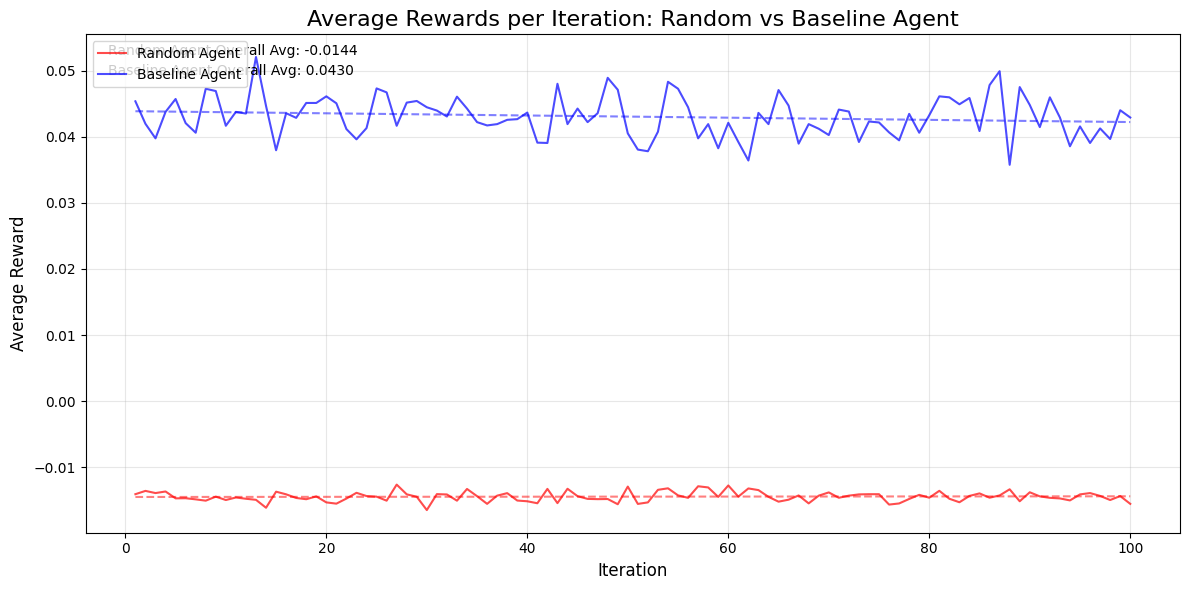

In [15]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, ITERS + 1), rnd_avg_rewards, label='Random Agent', color='red', alpha=0.7)
plt.plot(range(1, ITERS + 1), baseline_avg_rewards, label='Baseline Agent', color='blue', alpha=0.7)

# Add a trend line for each agent
z_rnd = np.polyfit(range(1, ITERS + 1), rnd_avg_rewards, 1)
p_rnd = np.poly1d(z_rnd)
plt.plot(range(1, ITERS + 1), p_rnd(range(1, ITERS + 1)), "r--", alpha=0.5)

z_base = np.polyfit(range(1, ITERS + 1), baseline_avg_rewards, 1)
p_base = np.poly1d(z_base)
plt.plot(range(1, ITERS + 1), p_base(range(1, ITERS + 1)), "b--", alpha=0.5)

# Customize the plot
plt.title('Average Rewards per Iteration: Random vs Baseline Agent', fontsize=16)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Average Reward', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add text with overall average rewards
plt.text(0.02, 0.98, f"Random Agent Overall Avg: {np.mean(rnd_avg_rewards):.4f}", 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.02, 0.94, f"Baseline Agent Overall Avg: {np.mean(baseline_avg_rewards):.4f}", 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
tf.keras.utils.disable_interactive_logging()

# Initialize lists to store average rewards
dqn_avg_rewards = []

for iter in trange(10):
    # Initialize environments and agents
    env = OriginalSnakeEnvironment(10, BOARD_SIZE)
    dqn_agent = DQNAgent(env.boards)
    rnd_agent = RandomAgent(env.boards)

    dqn_rewards = []

    for _ in range(30):
        # Get the actions from the agent
        actions = dqn_agent.get_actions()

        # Save the current state before moving on
        prev_boards = env.boards.copy()

        # Perform the actions and get the rewards from the environment
        rewards = env.move(actions)

        # Get the next state
        next_boards = env.boards.copy()

        # Make the agent learn
        dqn_agent.learn(prev_boards, actions, rewards, next_boards)

        # Store the rewards for each move
        dqn_rewards.append(rewards)

    # Compute the average reward for this iteration
    dqn_avg_rewards.append(np.mean(dqn_rewards))

# After the training loop, you can plot or analyze the average rewards
print(f"DQN Agent Average Rewards over {ITERS} iterations: {np.mean(dqn_avg_rewards)}")


  0%|          | 0/10 [00:00<?, ?it/s]

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29


 10%|█         | 1/10 [00:16<02:24, 16.06s/it]

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15


 10%|█         | 1/10 [00:25<03:47, 25.32s/it]


KeyboardInterrupt: 

## Model

In [ ]:
# define the models that you need ()
agent = ...
value = ...
q = ...

## Training

In [34]:
optimizer = tf.keras.optimizers.legacy.Adam(1e-4)

In [ ]:
for iteration in trange(ITERATIONS):
    # get current state of the boards
    state = env_.to_state()
    with tf.GradientTape(persistent=True) as tape:
        """ 
        tensor of actions, consider that
            UP = 0
            RIGHT = 1
            DOWN = 2
            LEFT = 3
        """
        actions = ... 
        rewards = env_.move(actions)
        new_state = tf.constant(env_.to_state())

        # calculate the loss of whichever algorithm you have picked
        loss = ...

    gradient = tape.gradient(..., ...)
    optimizer.apply_gradients(zip(gradient, ...))

 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [10]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    print(actions.shape)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

  0%|          | 0/1000 [00:00<?, ?it/s]

(100, 1)
